In [1]:
import os
import torch
from src.models.reverse_module import ReversePredictor
from src.utils.plots import plot_attention_maps
from src.datamodules.reverse_datamodule import ReverseDataModule
import torch.nn.functional as F

In [2]:
CHECKPOINT_PATH = '../logs/experiments/runs/reverse_transformer/2022-04-14_19-29-54/checkpoints/epoch=4-step=1950.ckpt'
device = device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

In [5]:
print('device', device)

device cuda:0


In [3]:
reverse_model = ReversePredictor.load_from_checkpoint(CHECKPOINT_PATH)
reverse_dm = ReverseDataModule()
reverse_dm.prepare_data()
test_dataloader = reverse_dm.test_dataloader()
# We plot a map for one item
data_input, labels = next(iter(test_dataloader))
inp_data = F.one_hot(data_input, num_classes=reverse_dm.num_classes).float()
inp_data = inp_data.to(device)

In [7]:
reverse_model.to(device)  # model also need to push to device

ReversePredictor(
  (input_net): Sequential(
    (0): Dropout(p=0.0, inplace=False)
    (1): Linear(in_features=10, out_features=32, bias=True)
  )
  (positional_encoding): PositionalEncoding()
  (transformer): TransformerEncoder(
    (layers): ModuleList(
      (0): EncoderBlock(
        (self_attn): MultiheadAttention(
          (qkv_proj): Linear(in_features=32, out_features=96, bias=True)
          (o_proj): Linear(in_features=32, out_features=32, bias=True)
        )
        (linear_net): Sequential(
          (0): Linear(in_features=32, out_features=64, bias=True)
          (1): Dropout(p=0.0, inplace=False)
          (2): ReLU(inplace=True)
          (3): Linear(in_features=64, out_features=32, bias=True)
        )
        (norm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (output_net): Sequential(
    (0): Linear(in_features=32, o

In [8]:
attention_maps = reverse_model.get_attention_maps(inp_data)

In [18]:
attention_maps[0].shape  # List[Tensor] with n_head equals to 1

torch.Size([128, 1, 16, 16])

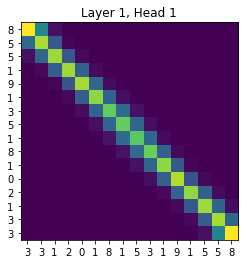

In [13]:
plot_attention_maps(data_input, attention_maps, idx=0)